# alg_workshop6

------------------------

Say that we have two sections of an identical class. Students in one of the sections will take the test before the students in the second section. Assume further that before an exam is administered, for each student in the first section, data is collected on the number of hours each student studied for the test. After the first section takes the test we also collect information on who has passed the test and who has not. This data looks like the following,

	Hours 0.50 0.75 1.00 1.25 1.50 1.75 1.75 2.00 2.25 2.50 2.75 3.00 3.25 3.50 4.00 4.25 4.50 4.75 5.00 5.50
	Pass     0    0    0    0    0    0    1    0    1    0    1    0    1    0    1    1    1    1    1    1

(Note, this is the motivational example in the wikipedia article on  [Logistic Regression](http://en.wikipedia.org/wiki/Logistic_regression))

What we would like to do next is to make predictions on who will pass the test from the second section as we ask them how many hours each student has studied.

Notice that there are many ways to approach this problem.

## Examples of approaches that do not require a model (Motivation) ##

### Nearest neighbor. ###
For example, we can use the "nearest neighbor" approach and say that if a student in section 2 studied for 1.9 hours, then this student is most like the student in section 1 who studied for 2 hours. Thus, our prediction is that this student will not pass the test. However, if another student studied for 1.8 hours, we would say that this student is most like the two students who studied for 1.75 hours and thus is just as likely to pass as to fail.
This approach is not very commonly used in statistical learning. However, it does not necessitate a model and is pretty simple conceptually. Nonetheless, the results are overly flexible and do not include much structure from the data. This approach will easily overfit the data, producing predictions based on noise as much as the signal embedded in the data.

### K nearest neighbors. ###
This approach requires us to look at k nearest neighbors in the data. For example if k=3, we would look at the three nearest neighbors and in our example of two students who studied 1.8 and 1.9 hours respectively, both would be given a one in three probability of passing the exam.
This approach also does not necessitate a model and is simple conceptually. However, it now starts to exhibit a little inference based on the structure of the data. However, the approach may also be too flexible in nature and thus open to ovefitting the data.

## Model based approaches ##
It is very common in statistical learning to assume that there is an underlying model that generated the data. For example, we can say that if a student studies for 1 hour or less their chances of passing the exam are one in 128. But, for every extra 45 minutes that a student studies, this student's chances of passing the exam doubles. Then we can go back and look at our data to see if our data supports this assumption.

### Objective function, part 1 ###
But, what does it mean that the data supports the model? 
Using our model, we now have a probability and we can use that probability to make a guess classification for the students in section 1. Then we can see how many times we were right and how many times we were wrong and decide if we are doing well in our prediction method based on these numbers.

### Parameterized model. ###
Alternatively, we can avoid making an assumption that it was 45 minutes and assume that the number of minutes is nM. Then we can go back to our objective function and figure out which value for nM will provide us with the best result. This, nM, is a parameter of our model. Using a different value for nM changes our model.



### Objective function, part 2 ###
When a student passes the exam and we assigned a probability of .99 to this student, we may want to acknowledge that with a higher mark than if we had a lower probability. However, our objective function did not differentiate between a probability of 0.51 and the probability of 0.99 since both of these would produce the same classification of a pass. Consequently, we rework our objective function.

So, let's define a little notation. Let $P(i) = 1$ if i-th student passed the exam and $P(i) = 0$ if i-th student failed. While, $\hat{pr}(i,nM)$ is the probability that i-th student passed the exam, given a value for the parameter nM.

Now, for example, we can define the objective function as,  

$\sum_{i} (P(i)-\hat{pr}(i,nM))^2$  

Minimizing this sum over different values of nM would provide us with a model.

### Logistic function: (a type of a parameterized model) ###

$\hat{pr}(i, \beta_0, \beta_1) = 1 / (1 + exp(-(\beta_0 + \beta_1 \; hours_i)))$  

This model guarantees that all probabilities are between 0 and 1.



### Objective (AKA Cost, Loss or Penalty) function, part 3 ###
Note, that there are many possible objective functions we can use. We will define two for this assignment (all using the logistic function above):

#### A) Square Error  

$\sum_{i} (P(i)-\hat{pr}(i,\beta_0,\beta_1))^2$  

#### B.i) Likelihood  

$\prod_{i\in Passed}\hat{pr}(i,\beta_0,\beta_1) \prod_{i\in Failed}(1-\hat{pr}(i,\beta_0,\beta_1)) $


#### B.ii) Log-Likelihood  
This is an equivalent formulation to (B.i), but you may find it easier to perform the maximization on the log, e.g., 

$\sum_{i\in Passed}ln(\hat{pr}(i,\beta_0,\beta_1)) + \sum_{i\in Failed}ln(1-\hat{pr}(i,\beta_0,\beta_1))$



# Actual Assignment #

### 1) Define a secret function below that will calculate a loss function given two inputs b0 and b1 (for $\beta_0$ and $\beta_1$).  
Most code is provided for you. You only need to modify the secret_function(b0,b1) where you see the "???".  
Before proceeding to part 2, make sure your plots match what I have below (i.e., submitted to github by me)

### 2) Play with code, and explain  
In this cell of the notebook (right below the separation dashes), explain  
- what values of learning rate and number of iterations are better / worse and why?
- what starting positions are better or worse, why?  
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10
def secret_function_2D(x): 
    x0 = x[0]
    x1 = x[1]
    return secret_function(x0,x1)
def logit(x): 
    val = 1/(1+np.exp(-x))
    return val, val*(1-val)
def secret_function(b0,b1): 
    hours  = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
    passed = [0   , 0   , 0   , 0   , 0   , 0   , 1   , 0   , 1   , 0   , 1   , 0   , 1   , 0   , 1   , 1   , 1   , 1   , 1   , 1   ]
    cost_total        = 0
    d_cost_slash_d_b0 = 0
    d_cost_slash_d_b1 = 0
    for i in range(len(hours)):
        # Forward pass 
        # (Note, here, we are calculating sensitivities of node output to input perturbations on the forward pass.)
        # (      This can be done either on forward or backward. Though usually, it is the backward pass.)
        
        # Sum Node
        sum_out = b0+b1*hours[i]
        d_sum_slash_d_b0 = 1
        d_sum_slash_d_b1 = hours[i]
        
        # logit node
        probability_estimated_i, d_prob_est_slash_d_input = logit(sum_out)
        
        # cost should be the square error of whether student passed (passed[i]) vs that student's estimated probability (probability_estimated_i)
        cost =  ???
        
        # sensitivity of the cost function above to a perturbation in the estimated probability (i.e., the derivative)
        # Note, you may want to work this out on paper by perturbing probability_estimated_i and seeing how much it changes the cost
        cost_sensitivity_to_probability_perturbation = ???
        
        # Backward pass
        cost_sensitivity_to_sum_node_output_perturbation = cost_sensitivity_to_probability_perturbation * d_prob_est_slash_d_input
        cost_sensitivity_to_b0_perturbation = cost_sensitivity_to_sum_node_output_perturbation * d_sum_slash_d_b0
        cost_sensitivity_to_b1_perturbation = cost_sensitivity_to_sum_node_output_perturbation * d_sum_slash_d_b1
        
        # sum these up for the total loss function
        cost_total        += cost
        d_cost_slash_d_b0 += cost_sensitivity_to_b0_perturbation
        d_cost_slash_d_b1 += cost_sensitivity_to_b1_perturbation
    
    return (cost_total,(d_cost_slash_d_b0,d_cost_slash_d_b1))

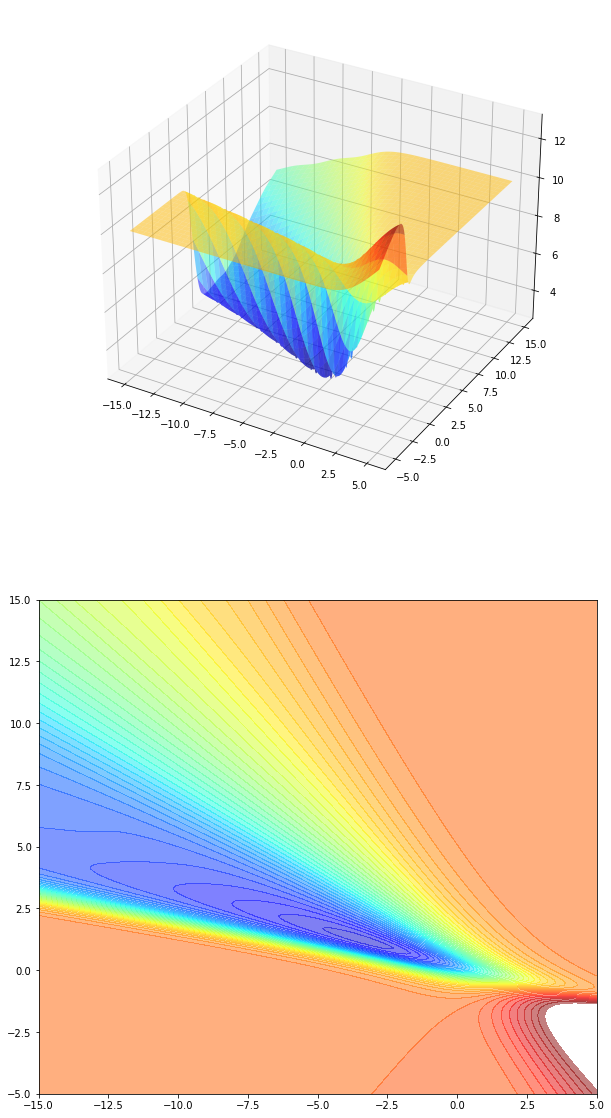

In [2]:
X0, X1 = np.meshgrid(np.arange(-15,5.01,.1), np.arange(-5,15.01,.1))
Z = secret_function(X0,X1)[0]
Z[Z>200]=np.nan # This prevents the high Z values from being plotted

plt.rcParams["figure.figsize"]=10,20
fig= plt.figure()
ax0 = fig.add_subplot(2,1,1,projection='3d')
ax0.plot_surface(X0, X1, Z, cmap='jet', alpha=.5)
ax1 = fig.add_subplot(2,1,2) # last number here means second of two; first two are the dimmensions of sub-plot area
clev = np.arange(2,12,.2) #Adjust the .001 to get finer gradient
ax1.contourf(X0, X1, Z,clev, cmap='jet', alpha=.5)
plt.rcParams["figure.figsize"]=10,10

In [3]:
def gd_weight_update(x_i, learning_rate = 1, fnctn=secret_function):
    f_f_prime = fnctn(x_i)
    x_new = x_i - learning_rate * np.array(f_f_prime[1])
    #print("f(x) and f'(x) at x={} are: ({:8.4f},{}) => x_next={}".format(x_i, f_f_prime[0], np.array(f_f_prime[1]), x_new))
    return x_new
def plot_gradient_descent_2D(x_0, learning_rate = 1, n_iterations = 10, fnctn=secret_function):
    fig, ax= plt.subplots()
    ax.contourf(X0, X1, Z, clev, cmap='jet', alpha=.5)
    np.set_printoptions(formatter={'float':lambda x: '{:8.4f}'.format(x)})
    x_i = x_0
    f_i = fnctn(x_i)[0]
    for _ in range(n_iterations): 
        x_next = gd_weight_update(x_i, learning_rate, fnctn)
        f_next = fnctn(x_next)[0]
        plt.plot([x_i[0],x_next[0]],[x_i[1],x_next[1]],"-ko")
        x_i,f_i = x_next,f_next
    np.set_printoptions() # reset
    return x_i

array([-10.53511331,   5.66159407])

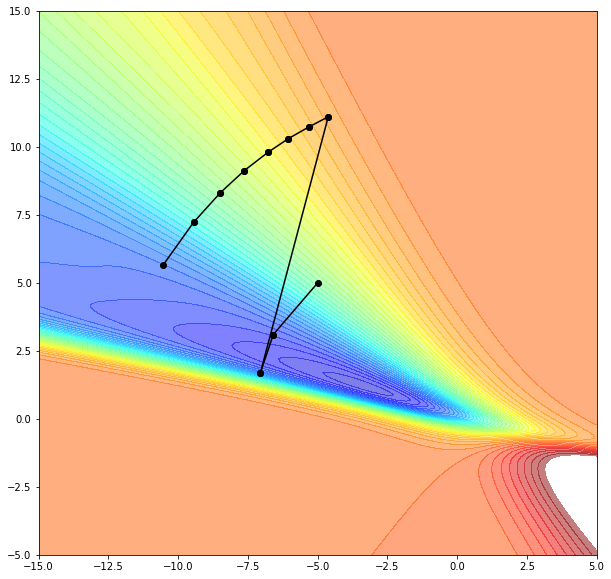

In [4]:
plot_gradient_descent_2D(np.array((-5,5)),2,10,secret_function_2D)